# Take-Home Exam 5: Decision Trees

*In this take-home exam, you are going to work with decision trees and observe how it performs with different hyperparameter settings.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th5`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

## Constructing a Decision Tree

A decision tree can be formulated as a regular tree structure in which nodes correspond to rules, condition checks and leaves correspond to prediction values. The construction process should be steered carefully. A tree that is grown without any constraint/limit may affect the performance drastically. In this exercise, you are going to train two different decision trees and observe how their classification boundaries change with respect to train data and then measure their performance on the test data.

To this end, you will be working with `data.csv` file that contains two features, namely `x` and `y`, and the target attribute `label`.

In [4]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()

,x,y,label
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


### Q1: Classification Boundaries

In this task, you will analyze how different hyperparameter settings affect the classification boundaries for decision trees. 

Below, you may find the function from the previous take-home exam to display the classification boundaries. However, the function is slightly changed. In addition to the previous parameters, it expects two more:

- `model` -> a model you generated
- `data` -> the feature set to train the `model` 
- `labels` -> corresponding label values 
- `ax` -> an axes object to plot the classification boundaries of the given model
- `title` -> the title of the given `ax` object

The function still trains the model, but you should also provide the data to be trained on. 

**Important:** The parameters `data` and `labels` should be numpy arrays, i.e. you should work with df[["x", "y"]].values which returns the numpy array of the specified columns.

---

1. Split the original data into two folds, namely *train* and *test*, in which 20% is reserved for the test data. Here, it's important that you **set the random_state parameter to 1** in train_test_split function.

2. Generate two different decision tree models. 

  - The first one should be generated with hyperparameter **`min_samples_leaf` set to 1**. `min_samples_leaf` is the minimum number of samples required to be at a leaf node. 

  - The second decision tree model should be initialized with **`min_samples_leaf` set to 5** and **`max_depth` set to 4**. `max_depth` hyperparameter controls the maximum depth of the tree.

3. Display the resulting classification boundaries in a **1x2 layout**. Utilize the axes titles to highlight the models.

  - Here, you should **put the train data as a parameter to the `visualize_model` function**, i.e. the function call should be visualize_model(model, x_train, y_train, ax, title).


Once you generate the boundaries, comment on the results. Disscuss the model performances with respect to generalizability, i.e. which model would perform better with unseen test data.

In [0]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

def visualize_model(model, data, labels, ax, title):
  step = 0.05

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  model.fit(data, labels)

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  y_pred = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])).reshape(xx.shape)

  ax.pcolormesh(xx, yy, y_pred, cmap=cmap_light)
  ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(title)

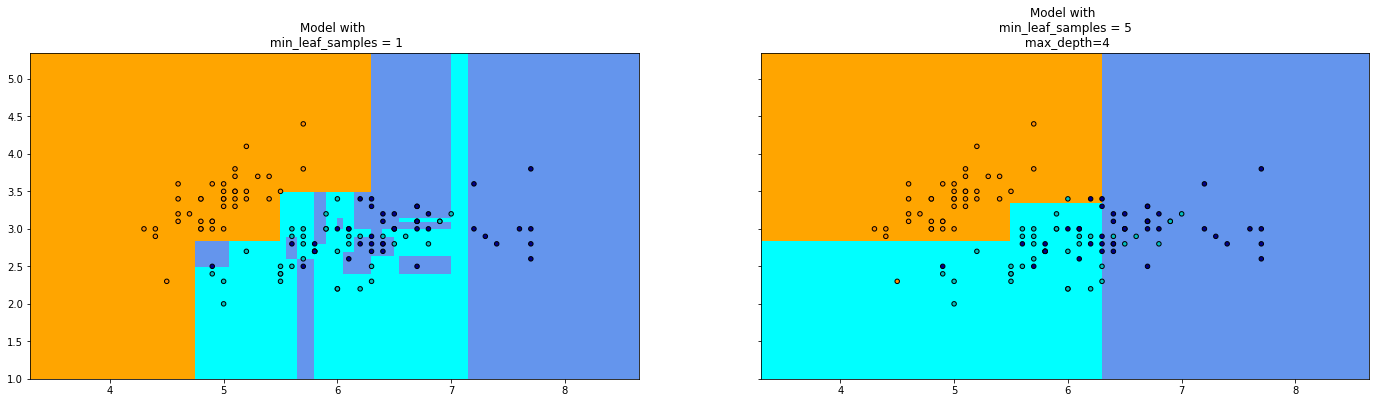

In [6]:
# your code
from sklearn import tree
from sklearn.model_selection import train_test_split

fig, axs = plt.subplots(1, 2, figsize=(24, 6), sharey=True)

X = df.drop('label',axis = 1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

model1 = tree.DecisionTreeClassifier(min_samples_leaf=1) #Create decision tree classifier object
model2 = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) #Create decision tree classifier object

X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)

visualize_model(model1, X_train_arr, y_train_arr, axs[0], "Model with \n min_leaf_samples = 1")
visualize_model(model2, X_train_arr, y_train_arr, axs[1], "Model with \n min_leaf_samples = 5 \n max_depth=4")

<font color="blue">[Double Click to Insert Your Comments]</font>

Visualization of the first model with min_leaf_samples = 1 seems to overfit our data. For example near x=5.5, y=2.75 we see that area is blue. However turquoise dots are more common there, so it should be turquoise. On the other graph, we don't see overfitting. It also doesn't underfit, so it is kind of a graph that we want.

### Q2: Model Performance

In the previous task, you performed a visual inspection on the decision tree models. Here, you are going to compare the performance with respect to the test data. And then solidify your findings with cross validation.

1. For both of the models, find the accuracy score on the train data. 
  - Here, the models are already trained with the train data. Measure the performance of the models on the train data.

2. For both of the models, find the accuracy score on the test data.

Once you extract the accuracy values, display the model performances' in a bar chart. An exemplary figure can be found below. 

<img height="300" widht="300" src="https://i.ibb.co/gjDm65z/gg.png"/>

Compare the models in terms of their performance on train and test data. Discuss the difference between the results. And try to explain the reason behind the difference.

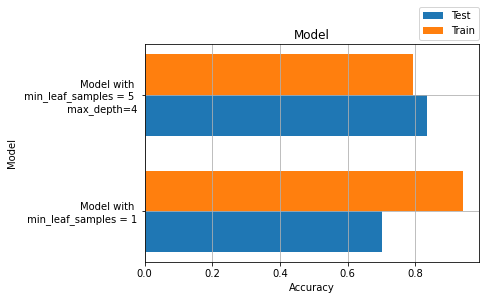

In [7]:
# your code
from sklearn.metrics import accuracy_score
model1_test_pre = model1.predict(X_test)
model1_train_pre = model1.predict(X_train)
model2_test_pre = model2.predict(X_test)
model2_train_pre = model2.predict(X_train)

model1_test_acc = accuracy_score(y_test, model1_test_pre)
model1_train_acc = accuracy_score(y_train, model1_train_pre)
model2_test_acc = accuracy_score(y_test, model2_test_pre)
model2_train_acc = accuracy_score(y_train, model2_train_pre)

index = np.arange(5)
bar_width = 0.35


N = 2
test_list = (model1_test_acc, model2_test_acc)
train_list = (model1_train_acc, model2_train_acc)

ind = np.arange(N) 
width = 0.35       
plt.barh(ind, test_list, width, label='Test')
plt.barh(ind + width, train_list, width,
    label='Train')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model')

plt.grid()

plt.yticks(ind + width / 2, ('Model with \n min_leaf_samples = 1', 'Model with \n min_leaf_samples = 5 \n max_depth=4'))
plt.legend(loc=(0.82,1.02))
plt.show()

<font color="blue">[Double Click to Insert Your Comments]</font>

We see that overfitted model has a high accuracy in train data but lower in test data. On the other hand, other model has similar level of accuracies between test and train data and they are in middle of train and test accuracy of the other model.

### Q3: Cross Validation

Train-test splitting based model evaluations highly depend on the random splitting procedure. In order to evaluate your models in a more robust manner, you may apply cross validation.

Here, apply 10-Fold cross validation for both of the models and discuss the results.

1. Generate both of the models with the same set of hyperparameter settings.

2. Evalute your models with 10-Fold cross validation.

  - Here, you should be working with the original data. There is no need for the train/test folds.

Once you obtain the cross validation accuracy values, discuss the results. Which model is better and why? 

In [11]:
# your code
from sklearn.model_selection import cross_val_score

model1_cv = tree.DecisionTreeClassifier(min_samples_leaf=1) #Create decision tree classifier object
model2_cv = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) #Create decision tree classifier object

model1_cv_acc = cross_val_score(model1_cv, X, y, cv=10)
model2_cv_acc = cross_val_score(model2_cv, X, y, cv=10)

print("Accuracy of min_sample_leaf=1 : %0.2f (+/- %0.2f)" % (model1_cv_acc.mean(), model1_cv_acc.std() * 2))
print("Accuracy min_sample_leaf=5 : %0.2f (+/- %0.2f)" % (model2_cv_acc.mean(), model2_cv_acc.std() * 2))


Accuracy of min_sample_leaf=1 : 0.66 (+/- 0.18)
Accuracy min_sample_leaf=5 : 0.72 (+/- 0.20)


<font color="blue">[Double Click to Insert Your Comments]</font>

We see that our accuracy results decreased when we used 10 fold cross validation. The model we did in the first part with min_leaf_sample=5 seems to be the best model because it does not overfit nor underfit. Its accuracy is higher than the last models.